# A* vs MCTS

In [ ]:
%run "./Connectfour_mcts.ipynb"

In [ ]:
%run "./Mcts.ipynb"

In [ ]:
%run ".Astar.ipynb"

O Monte Carlo Tree Search é preferível ao A* em jogos de dois jogadores devido à sua capacidade de lidar com espaços de busca complexos e dinâmicos. Enquanto o A* é eficaz em problemas com um espaço de busca bem definido e uma heurística clara, o MCTS é mais eficiente em cenários onde as regras do jogo são menos previsíveis ou onde a heurística é difícil de definir. Isso deve-se à natureza probabilística do MCTS, que usa simulações aleatórias para explorar o espaço de busca e tomar decisões informadas.

In [3]:
from connect4 import ConnectFour
from mcts import MCTS
from astar import Astar

def play():
    state = ConnectFour()
    mcts = MCTS(state)

    while not state.game_over():
        print("Jogada do jogador O, A*:")
        # Faz o print inicial do tabuleiro
        state.print_board(state.board)

        # Pede a resposta ao Astar
        res = Astar.astar(state.board, True)

        if res is None:
            print("O tabuleiro está completo.")
            break

        # Pões resposta no tabuleiro
        col_O = res.move
        row_O = state.empty_row(state.board, col_O)
        state.drop_token(state.board, row_O, col_O, state.PLAYER_O)
        mcts.move(col_O)

        # Faz print do tabuleiro
        print("Jogada do jogador X, MCTS:")
        state.print_board(state.board)

        if state.game_over():
            print("Player one won!")
            break

        print("Thinking...")

        # Pede as coisas ao mcts
        mcts.search(1)
        num_rollouts, run_time = mcts.statistics()
        print("Statistics: ", num_rollouts, "rollouts in", run_time, "seconds")
        move = mcts.best_move()

        print("MCTS chose move: ", move)

        col_X = move
        row_X = state.empty_row(state.board, col_X)
        state.drop_token(state.board, row_X, col_X, state.PLAYER_X)
        mcts.move(col_X)

        if state.game_over():
            print("Player two won!")
            break


if __name__ == "__main__":
    play()


AttributeError: 'ConnectFour' object has no attribute 'game_over'

Realizamos uma experiência para avaliar o desempenho do algoritmo MCTS (Monte Carlo Tree Search) em comparação com o A* num jogo específico. Modificamos o tempo de busca do MCTS em cinco diferentes configurações: 1 segundo, 2 segundos, 3 segundos, 4 segundos e 5 segundos. Em seguida, executamos o programa para cada configuração de tempo, realizando 20 jogos para cada uma. Registramos os resultados desses jogos, contabilizando o número de vitórias do MCTS e do A* em cada configuração de tempo. Os resultados mostram que, à medida que aumentamos o tempo de procura do MCTS, sua taxa de vitória tende a aumentar, com o A* ganhando menos frequentemente conforme o tempo do MCTS aumenta. Essas informações estão representadas no gráfico abaixo.

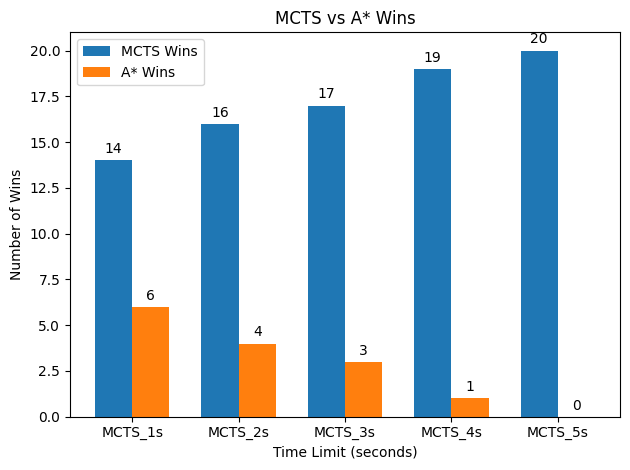

In [1]:
import matplotlib.pyplot as plt

# Data
data = {
    'MCTS_1s': {'MCTS_WINS': 14, 'A*_WINS': 6},
    'MCTS_2s': {'MCTS_WINS': 16, 'A*_WINS': 4},
    'MCTS_3s': {'MCTS_WINS': 17, 'A*_WINS': 3},
    'MCTS_4s': {'MCTS_WINS': 19, 'A*_WINS': 1},
    'MCTS_5s': {'MCTS_WINS': 20, 'A*_WINS': 0}
}

# Extract data
labels = list(data.keys())
mcts_wins = [data[label]['MCTS_WINS'] for label in labels]
astar_wins = [data[label]['A*_WINS'] for label in labels]

# Plot
x = range(len(labels))
bar_width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, mcts_wins, bar_width, label='MCTS Wins')
rects2 = ax.bar([i + bar_width for i in x], astar_wins, bar_width, label='A* Wins')

# Add labels, title, and legend
ax.set_xlabel('Time Limit (seconds)')
ax.set_ylabel('Number of Wins')
ax.set_title('MCTS vs A* Wins')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()